<a href="https://colab.research.google.com/github/juan-a-vac/Mantener-talentos-RRHH/blob/main/Departamento_de_Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contexto:

- Contratar y retener empleados son tareas extremadamente complejas que requieren de capital, tiempo y otras distintas habilidades.

- Estudios declaran que los propietarios de pequeñas empresas dedican aproximadamente el 40% de su jornada laboral a tareas que no generan ingresos, como lo son la contratación de talentos.

- En otros estudios, se estima que las empresas gastan entre un 15% y un 20% del salario del empleado para contratar un nuevo candidato

- Una empresa promedio pierde entre el 1% y el 2.5% de sus ingresos totales en el tiempo que lleva poner al dia a un nuevo empleado.

- Contratar a un nuevo empleado cuesta un promedio de $7645 (para una empresaa de entre 0 y 500 empleados).

- En promedio se necesitan 52 dias para cubrir un puesto.

En este caso, nos situamos como cientifico de datos en una empresa multinacional.

El equipo de recursos humanos recopiló datos sobre sus empleados y nos pide que desaarrollemos un modelo que pueda predecir qué empleados tienen mayores probabilidades de renunciar.

In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Curso Data Science/Curso DS para negocios/01) Recursos Humanos/Human_Resources.csv")

In [ ]:
#damos un breve vistaso al dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Anteriormente encontramos variables de tipo object, vamos a estudiarlas mejor para intentar transformarlas ya que, 
#para aplicar el modelo es necesario pasarlas a datos numericos
subdf = df.select_dtypes(include=['object'])
subdf.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
subdf.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
# en este caso nos interesa la fila unique para modificar posteriormente los datos.
#podemos modificar varias columnas con valores de numeros, como cambiar los valores de Attrition, Gender, Over18, OverTime a valores de 0 y 1 para que el codigo posterior los interprete

In [ ]:
for col in subdf.columns:
    print(f'Valores únicos en la columna {col}:')
    print(df[col].unique())

Valores únicos en la columna Attrition:
['Yes' 'No']
Valores únicos en la columna BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Valores únicos en la columna Department:
['Sales' 'Research & Development' 'Human Resources']
Valores únicos en la columna EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Valores únicos en la columna Gender:
['Female' 'Male']
Valores únicos en la columna JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Valores únicos en la columna MaritalStatus:
['Single' 'Married' 'Divorced']
Valores únicos en la columna Over18:
['Y']
Valores únicos en la columna OverTime:
['Yes' 'No']


las opciones que tienen 2 resultados posibles las cambiamos por 0 y 1 al resto le aplicaremos un onehotencoding

In [ ]:
#las opciones que tienen 2 resultados posibles las cambiamos por 0 y 1, al resto le aplicaremos un OneHotEncoding
df["Attrition"]=df["Attrition"].map({"Yes":1,"No":0})
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Over18"]=df["Over18"].map({"Y":1,"N":0})
df["OverTime"]=df["OverTime"].map({"Yes":1,"No":0})

In [ ]:
#Observamos el cambio el tipo de datos de estas columnas
subdf = df.select_dtypes(include=['object'])
subdf.head(5)

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


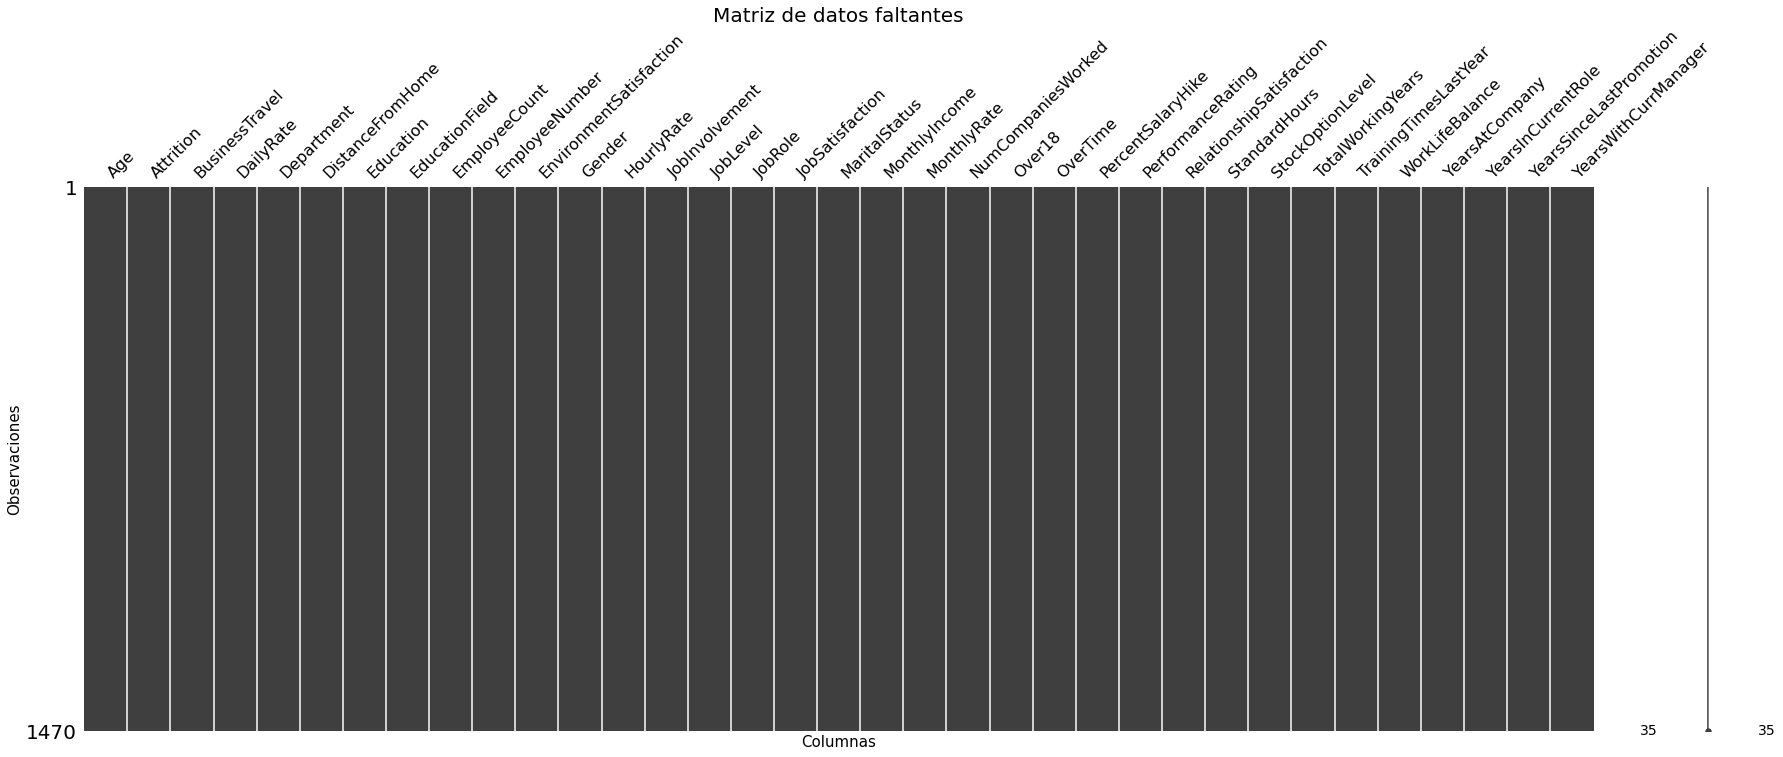

In [ ]:
# Visualizar la matriz de valores faltantes
msno.matrix(df, figsize=(30, 10), sparkline=True)

# Configurar el título y los ejes
plt.title('Matriz de datos faltantes',fontsize=20)
plt.xlabel('Columnas',fontsize=15)
plt.ylabel('Observaciones',fontsize=15)

# Mostrar la visualización
plt.show()

In [ ]:
#no tenemos datos faltantes
#vamos a ver ahora como se distribuye cada una de las variables de nuestro dataset para intentar de obtener insights

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'HourlyRate'}>],
       [<Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>

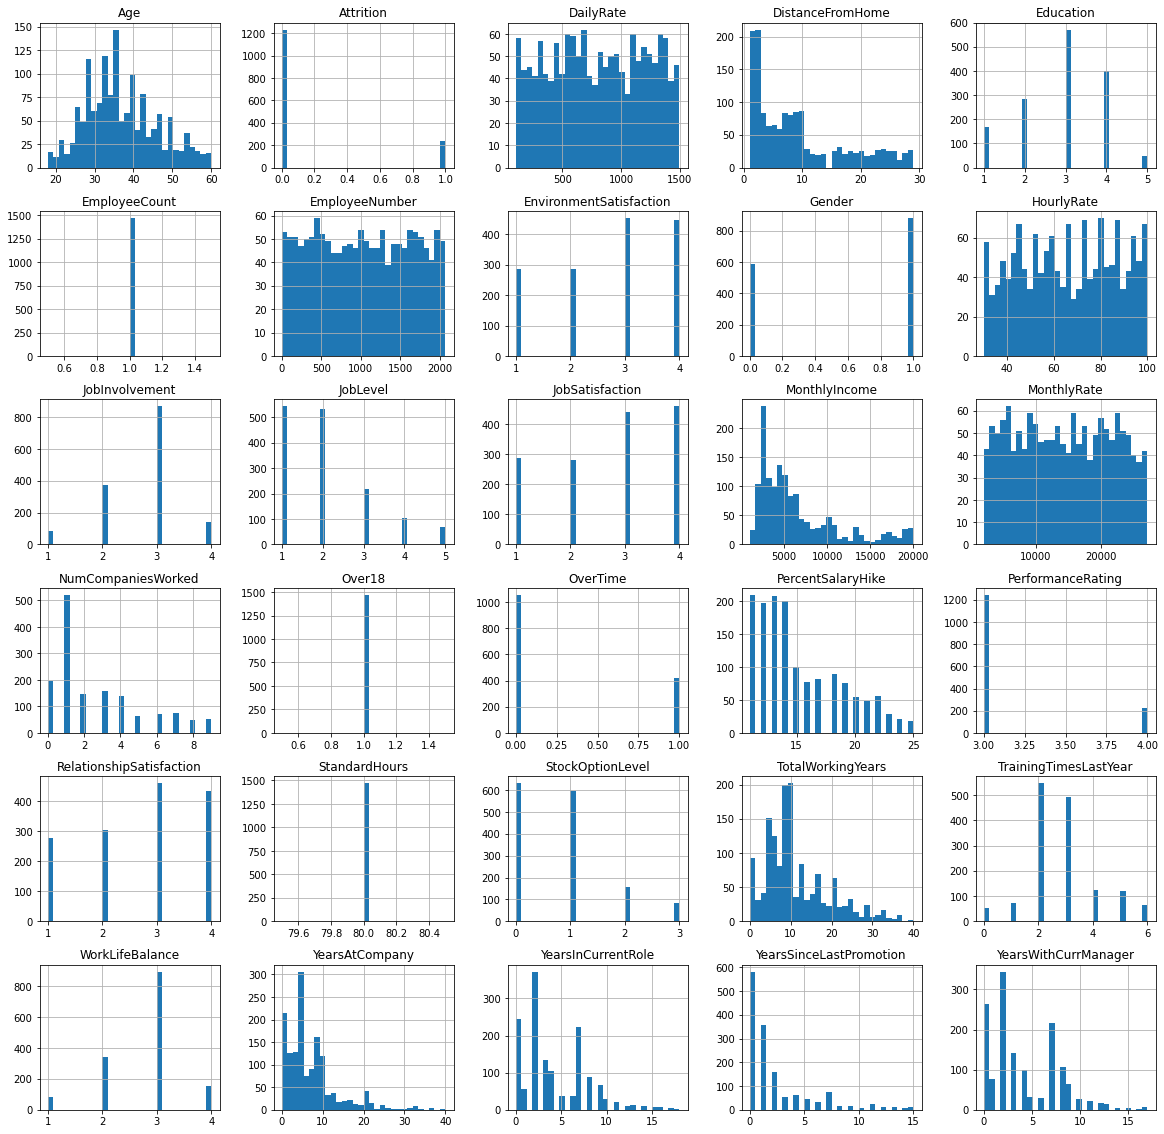

In [ ]:
df.hist(figsize= (20,20), bins=30)

Podemos observar lo siguiente:
- La gran mayoria de los empleados se encuentra entre los 40 y 40 años de edad
- De los 1200 empleados un 80% se quedan en la empresaa y un 20 se marchan, este es el dato q vamos a  usar para modelar a los empleados.

A continuacion vamos a eliminar las features que no nos sirven para el modelo ya que son constantes en todos los empleados, como el standar hours, el over18,el EmployeeCount y el EmployeeNumber ya que es un numero de identificacion de cada empleado por lo que no denota ninguna caracteristica especial del mismo que podriamos tener en cuenta para la caracterizacion de un empleado que se va de la empresa


In [ ]:
df.drop(["EmployeeCount","StandardHours", "Over18", "EmployeeNumber"],axis=1,inplace=True)

In [ ]:
df.describe()

<bound method NDFrame.describe of       Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Educa

In [ ]:
se_van_df= df[df["Attrition"]==1]
se_quedan_df=df[df["Attrition"]==0]

In [ ]:
# Contamos el número de empleados que se quedaron y el numero de los que se fueron
print("cantidad total de empleados ", len(df))
print("cantidad de empleados que se van ", len(se_van_df))
print("cantidad de empleados que se quedan ",len(se_quedan_df))
print("porcentaje de empleados que se van ", len(se_van_df)/len(df)*100)
print("porcentaje de empleados que se quedan ",len(se_quedan_df)/len(df)*100)

cantidad total de empleados  1470
cantidad de empleados que se van  237
cantidad de empleados que se quedan  1233
porcentaje de empleados que se van  16.122448979591837
porcentaje de empleados que se quedan  83.87755102040816


Podemos observar que el porcentaje de los empleados que se van es mucho menor al de los que se quedan por lo que esta clase esta desbalanceada y tenderemos que tener en cuenta balancearlas antes de aplicar el modelo.

In [ ]:
# Comparemos la media y el error estándar de los empleados que se quedaron y se fueron

In [ ]:
se_va_df.describe()

In [ ]:
se_quedan_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,0.593674,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,0.491346,20.380754,0.692050,1.117933,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,1.000000,83.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
# 'age': la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los empleados que se quedaron es mayor
# 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options

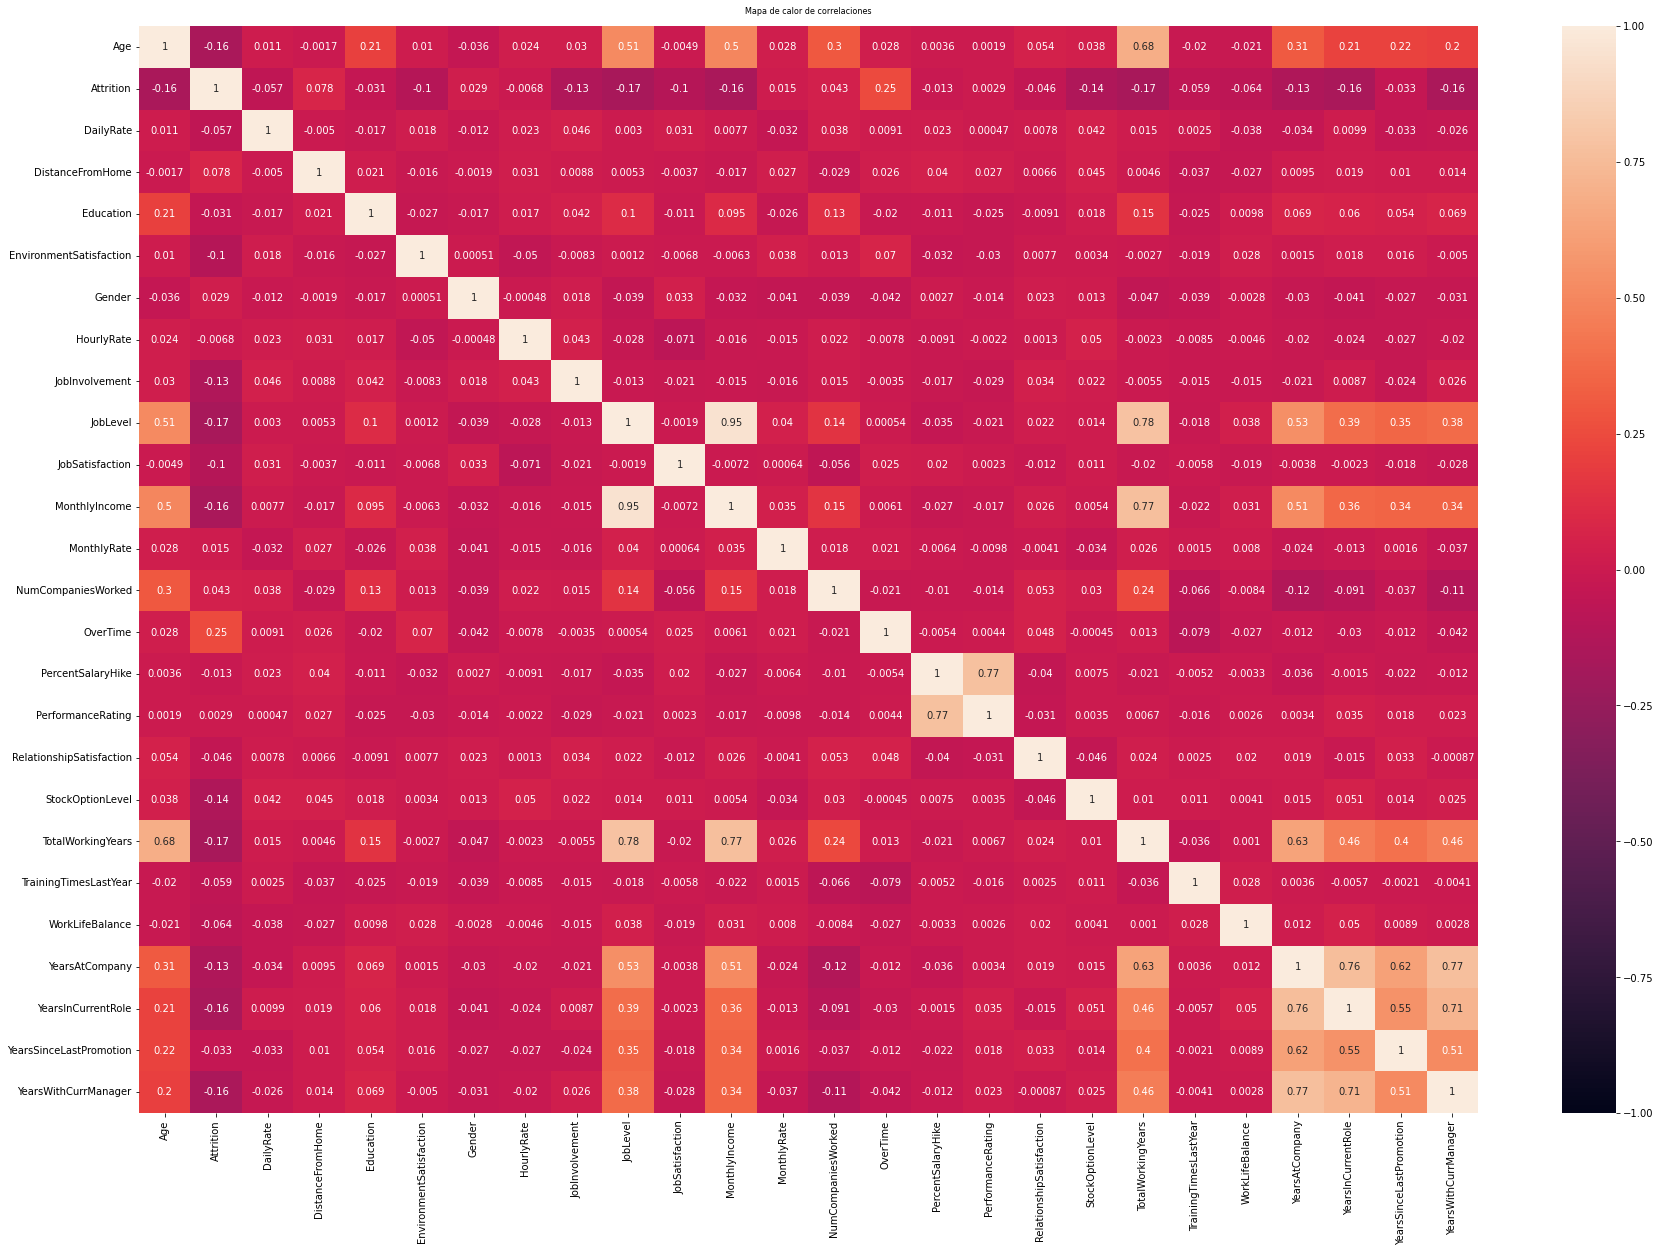

In [ ]:
# Matriz de correlaciones
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa de calor de correlaciones', fontdict={'fontsize':8}, pad=12);

In [ ]:

# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales
# Monthly income está altamente correlacionado con el total de años trabajados
# Age está altamente correlacionado con  el total de años trabajados

Vamos a graficar las variables que teoricamente se pueden relacionar con la salida de empleados desde la empresa.

<Axes: xlabel='Age', ylabel='count'>

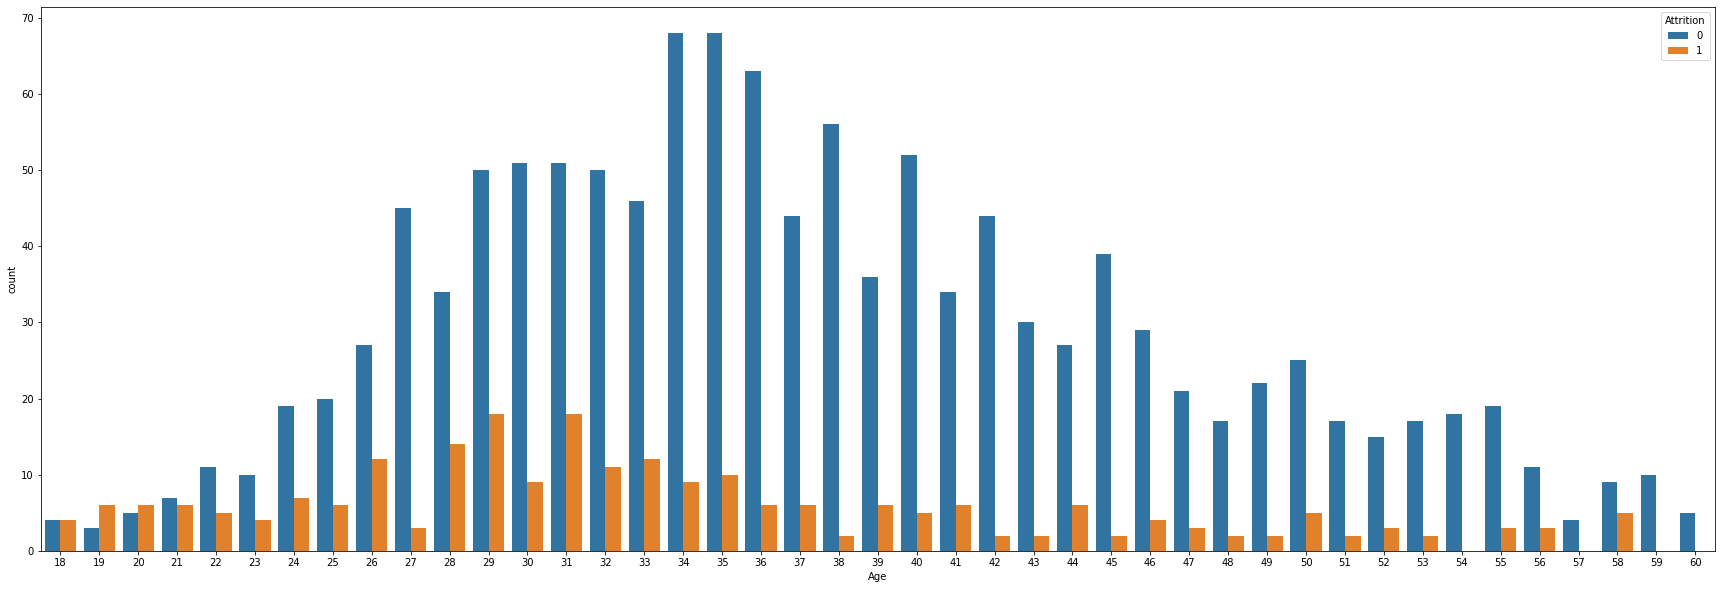

In [ ]:
plt.figure (figsize=(30,10))
sns.countplot(x = "Age", hue = "Attrition",data = df)

Podemos ver, que dependiendo de la edad, no es la misma la cantidad de empleados que se quedan respecto de los que van, se ve que se forma una curva con una tendencia normal levemente sesgada a la izquierda, en la cual podemos ver que la mayoria de empleados que se van se encuentran en una edad entre los 28 y los 34 años.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

<Axes: xlabel='JobLevel', ylabel='count'>

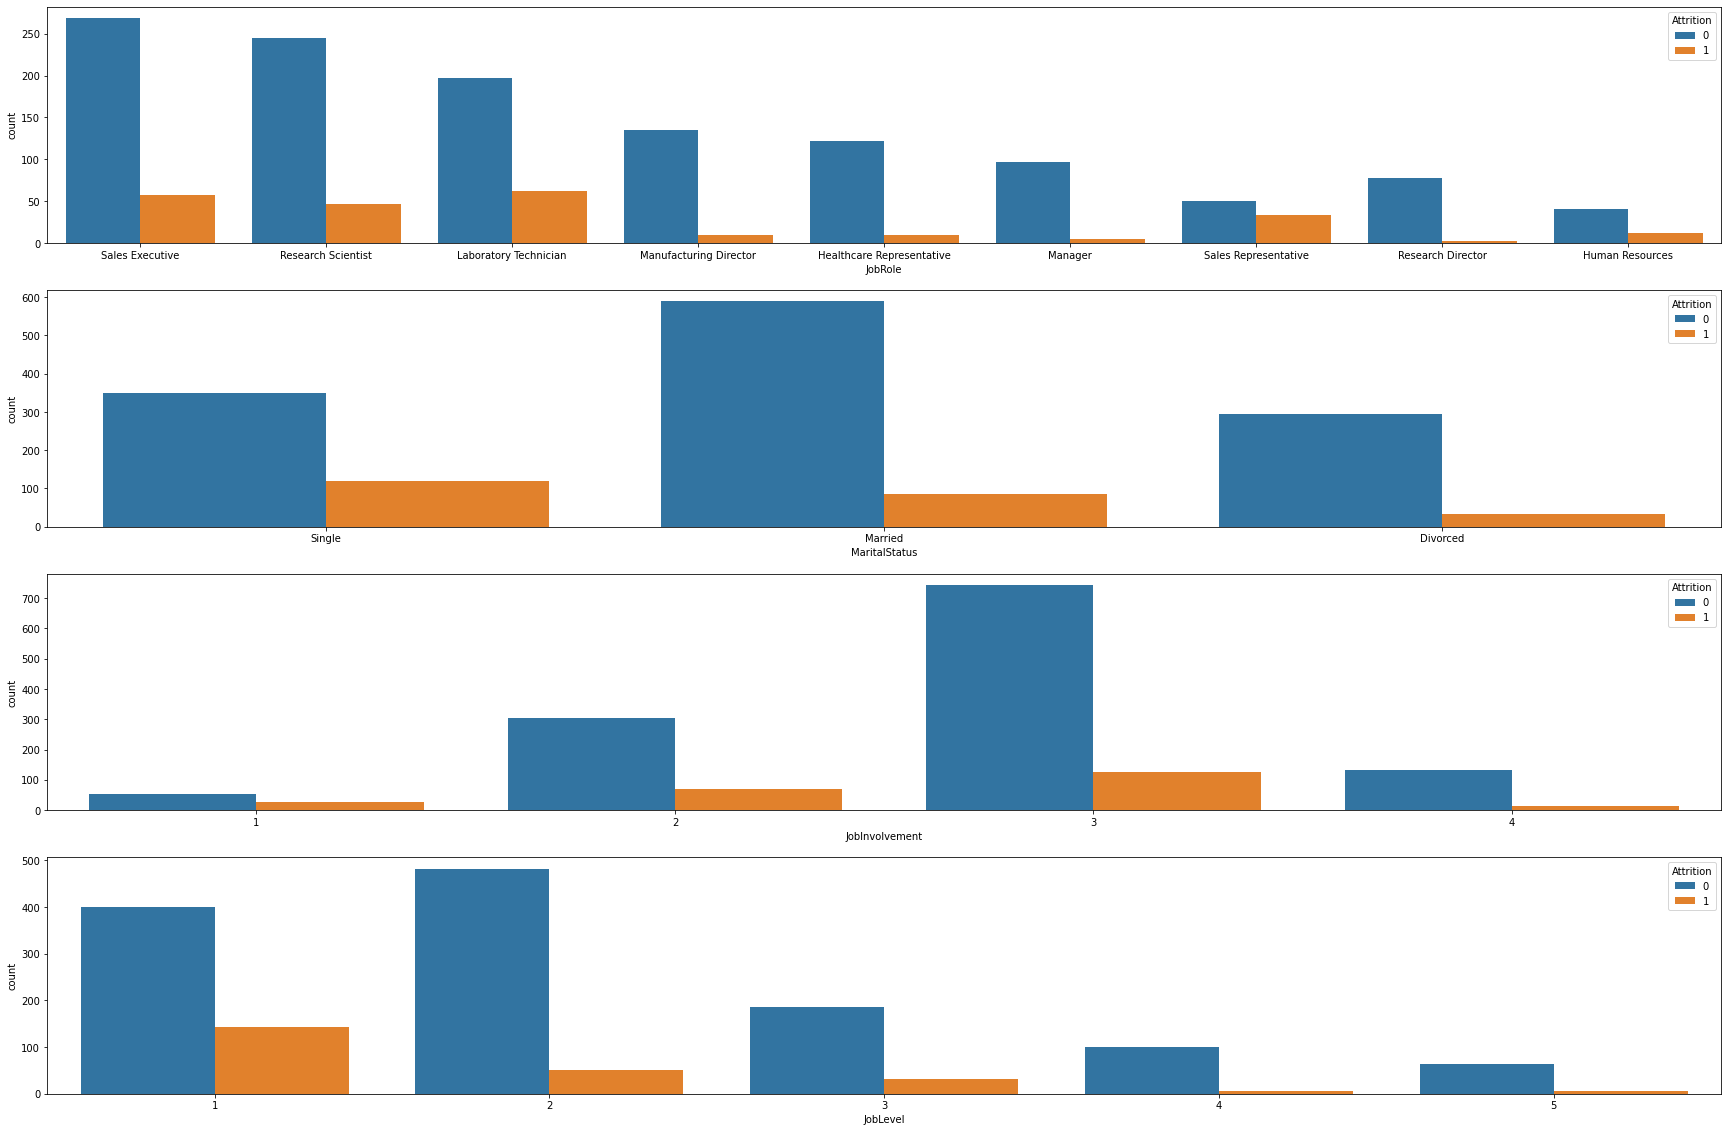

In [ ]:
plt.figure (figsize=(30,20))
plt.subplot(411)
sns.countplot(x = "JobRole", hue = "Attrition",data = df)
plt.subplot(412)
sns.countplot(x = "MaritalStatus", hue = "Attrition",data = df)
plt.subplot(413)
sns.countplot(x = "JobInvolvement", hue = "Attrition",data = df)
plt.subplot(414)
sns.countplot(x = "JobLevel", hue = "Attrition",data = df)
# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro trabajo
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

- Observamos que en ventas tenemos aproximadamente la misma proporcion de empleados que se quedan, respecto de los que se van, a este le sigue los técnicos en laboratorios que tambien tienen una alta proporcion.

- Respecto al estado marital, mayormente las personas en la empresaa se encuentra casadas y en proporcion, los que mas suelen irse son los solteros.

- La gente que apenas se involucra en la empresa, tienen menos apego y toman mas seguido la opcion de irse, y cuanto mas involucrados estan, menos se marchan.

- Respecto al nivel de trabajo, a mayor nivel menos se marchan, (a menor puesto de trabajo, mas probable es que se marchen).



Utilizaremos ahora la funcion de densidad KDE(kernel densiti estimate), la cual nos ayuda a estudiar la distribucion de probabilidad de una variable continua

<ipython-input-108-f16fd7096f8b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_van_df["DistanceFromHome"], label= "empleados que se marchan", shade="True",color="r")
<ipython-input-108-f16fd7096f8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_quedan_df["DistanceFromHome"], label= "empleados que se marchan", shade="True", color="g")


Text(0.5, 0, 'distancia desde casa al trabajo')

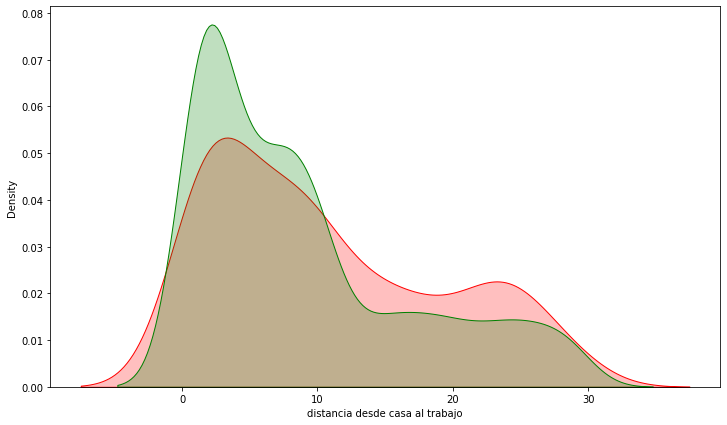

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(se_van_df["DistanceFromHome"], label= "empleados que se marchan", shade="True",color="r")

sns.kdeplot(se_quedan_df["DistanceFromHome"], label= "empleados que se marchan", shade="True", color="g")
plt.xlabel("distancia desde casa al trabajo")

A partir de loas 10km la distribucion de los que se marchan sobrepasa a los que se quedan,por loo que puede existir una correlacion entre la distancia al trabajo y que el trabajador se quede o marche.

<ipython-input-109-69e7e8fe8752>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_van_df["YearsWithCurrManager"], label= "empleados que se marchan", shade="True",color="r")
<ipython-input-109-69e7e8fe8752>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_quedan_df["YearsWithCurrManager"], label= "empleados que se marchan", shade="True", color="g")


Text(0.5, 0, 'años con el mismo gerente')

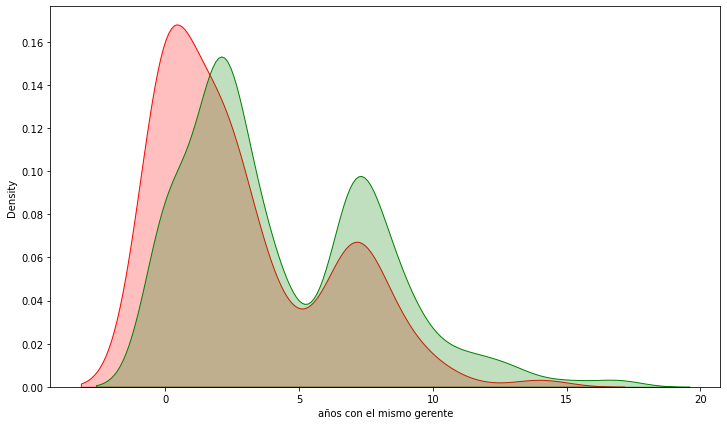

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(se_van_df["YearsWithCurrManager"], label= "empleados que se marchan", shade="True",color="r")

sns.kdeplot(se_quedan_df["YearsWithCurrManager"], label= "empleados que se marchan", shade="True", color="g")
plt.xlabel("años con el mismo gerente")

A medida que aumenta la cantidad de años con el manager ya es mas probable que se queden en la empresa.

<ipython-input-110-20bc225fa824>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_van_df["TotalWorkingYears"], label= "empleados que se marchan", shade="True",color="r")
<ipython-input-110-20bc225fa824>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(se_quedan_df["TotalWorkingYears"], label= "empleados que se marchan", shade="True", color="g")


Text(0.5, 0, 'total de años trabajados')

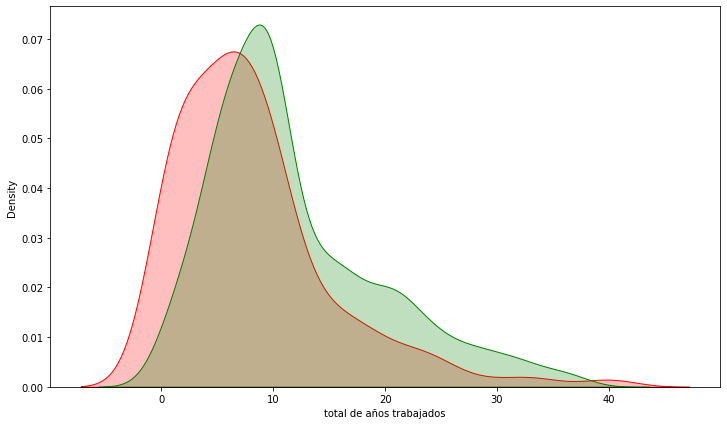

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(se_van_df["TotalWorkingYears"], label= "empleados que se marchan", shade="True",color="r")

sns.kdeplot(se_quedan_df["TotalWorkingYears"], label= "empleados que se marchan", shade="True", color="g")
plt.xlabel("total de años trabajados")

A medida que aumenta la cantidad de años trabajados, es mas probable que nos quedemos, aun asi esto sucede a partir de los 6 años en la empresa

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

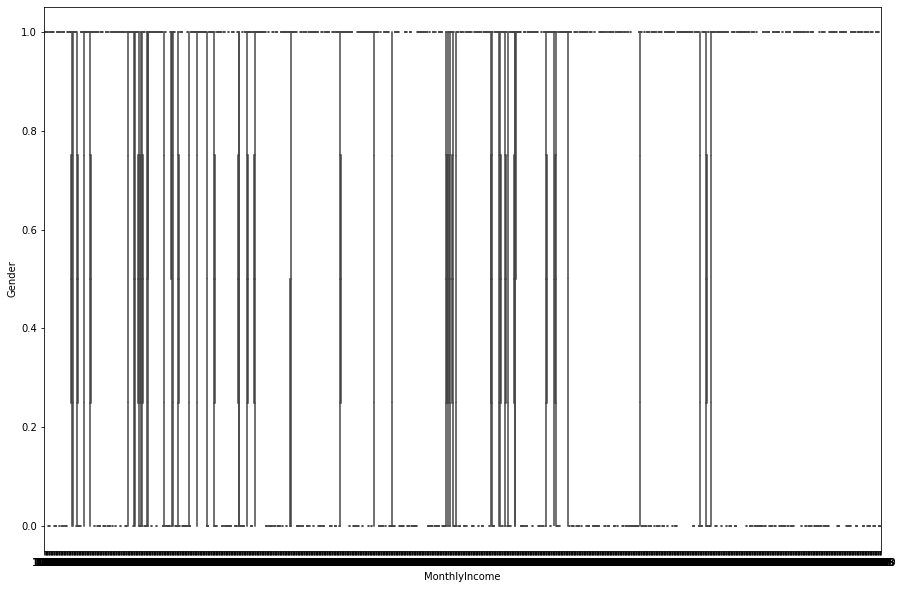

In [ ]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)


Se puede apreciar que no hay discriminacion en el sueldo respecto a los generos.
Podemos ver que la media es bastante similar, en las mujeres el 3er cuartil es mayor por lo que estarian ganando mas, existen outliers que deberiamos tratar

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

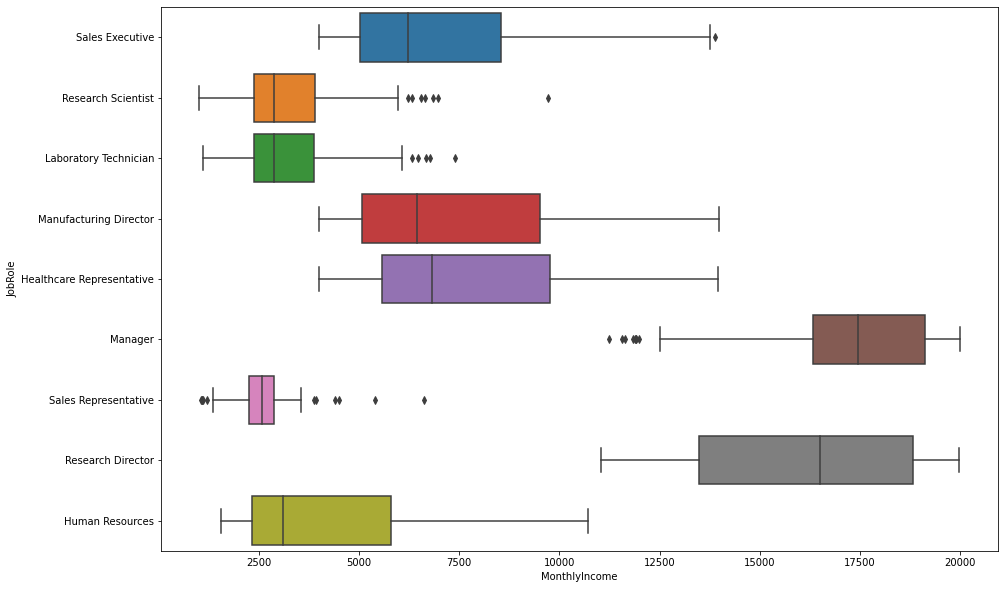

In [ ]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

Podemos observar que la gente que gana mas dinero son los managers, los directores (aunque con mas variabilidad), los representantes de ventas son los peores pagados.

Realizaremos el balanceo de las clase mediante un metodo de OverSampling

In [ ]:
df.shape

(1470, 31)

In [ ]:
#importamos los paquetes
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

In [ ]:
data = df.drop(columns=["Attrition"])
data.shape

(1470, 30)

In [ ]:
target = df["Attrition"]


In [ ]:
#ROS. Duplica muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(data,target)
Se_vanRos = targetRos.sum()
Se_quedan_Ros = targetRos.shape[0]- Se_vanRos
print('Se van ', Se_vanRos, ' , Se quedans: ', Se_quedan_Ros  )
dataRos

Se van  1233  , Se quedans:  1233


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,26,Travel_Rarely,1146,Sales,8,3,Technical Degree,4,1,38,...,3,3,0,6,2,2,4,3,1,2
2462,33,Travel_Rarely,587,Research & Development,10,1,Medical,1,1,38,...,3,1,3,8,2,3,4,3,1,3
2463,39,Travel_Rarely,360,Research & Development,23,3,Medical,3,1,93,...,3,1,0,6,2,3,5,2,0,3
2464,29,Travel_Rarely,121,Sales,27,3,Marketing,2,0,35,...,4,4,3,10,3,2,10,4,1,9


In [ ]:
dataRos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2466 non-null   int64 
 1   BusinessTravel            2466 non-null   object
 2   DailyRate                 2466 non-null   int64 
 3   Department                2466 non-null   object
 4   DistanceFromHome          2466 non-null   int64 
 5   Education                 2466 non-null   int64 
 6   EducationField            2466 non-null   object
 7   EnvironmentSatisfaction   2466 non-null   int64 
 8   Gender                    2466 non-null   int64 
 9   HourlyRate                2466 non-null   int64 
 10  JobInvolvement            2466 non-null   int64 
 11  JobLevel                  2466 non-null   int64 
 12  JobRole                   2466 non-null   object
 13  JobSatisfaction           2466 non-null   int64 
 14  MaritalStatus           

Podemos ver que en el data frame todavia tenemos valores objet, los cuales tendremos que transformar a numericos, esto lo vamos a hacer mediante un OneHotEncoding.

In [ ]:
dataRos_cat = dataRos.select_dtypes(include=['object'])
dataRos_cat.head(5)

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [ ]:
dataRos_cat.describe()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
count,2466,2466,2466,2466,2466
unique,3,3,6,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married
freq,1688,1539,976,552,1032


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
dataRos_cat = onehotencoder.fit_transform(dataRos_cat).toarray()


In [ ]:
dataRos_cat.shape

(2466, 24)

In [ ]:
dataRos_cat = pd.DataFrame (dataRos_cat)
dataRos_cat

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2462,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2463,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2464,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
dataRos_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2466 non-null   float64
 1   1       2466 non-null   float64
 2   2       2466 non-null   float64
 3   3       2466 non-null   float64
 4   4       2466 non-null   float64
 5   5       2466 non-null   float64
 6   6       2466 non-null   float64
 7   7       2466 non-null   float64
 8   8       2466 non-null   float64
 9   9       2466 non-null   float64
 10  10      2466 non-null   float64
 11  11      2466 non-null   float64
 12  12      2466 non-null   float64
 13  13      2466 non-null   float64
 14  14      2466 non-null   float64
 15  15      2466 non-null   float64
 16  16      2466 non-null   float64
 17  17      2466 non-null   float64
 18  18      2466 non-null   float64
 19  19      2466 non-null   float64
 20  20      2466 non-null   float64
 21  21      2466 non-null   float64
 22  

Observamos que todos los datos son numericos

In [ ]:
 dataRos_num = dataRos.select_dtypes(include=['int64'])
 dataRos_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2466 non-null   int64
 1   DailyRate                 2466 non-null   int64
 2   DistanceFromHome          2466 non-null   int64
 3   Education                 2466 non-null   int64
 4   EnvironmentSatisfaction   2466 non-null   int64
 5   Gender                    2466 non-null   int64
 6   HourlyRate                2466 non-null   int64
 7   JobInvolvement            2466 non-null   int64
 8   JobLevel                  2466 non-null   int64
 9   JobSatisfaction           2466 non-null   int64
 10  MonthlyIncome             2466 non-null   int64
 11  MonthlyRate               2466 non-null   int64
 12  NumCompaniesWorked        2466 non-null   int64
 13  OverTime                  2466 non-null   int64
 14  PercentSalaryHike         2466 non-null 

In [ ]:
total_df= pd.concat([dataRos_cat,dataRos_num],axis=1)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         2466 non-null   float64
 1   1                         2466 non-null   float64
 2   2                         2466 non-null   float64
 3   3                         2466 non-null   float64
 4   4                         2466 non-null   float64
 5   5                         2466 non-null   float64
 6   6                         2466 non-null   float64
 7   7                         2466 non-null   float64
 8   8                         2466 non-null   float64
 9   9                         2466 non-null   float64
 10  10                        2466 non-null   float64
 11  11                        2466 non-null   float64
 12  12                        2466 non-null   float64
 13  13                        2466 non-null   float64
 14  14      

A continuacion vamos a escalar los datos para posteriormente poder trabajarlos en el modelo,

In [ ]:
total_df.columns = total_df.columns.astype(str)# transformamos los nombres de las columnas a str porque si no no  te deja aplicar el minmaxscaler
print (total_df)

        0    1    2    3    4    5    6    7    8    9  ...  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2461  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
2462  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2463  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2464  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...   
2465  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3       

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s = scaler.fit_transform(total_df)

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         2466 non-null   float64
 1   1                         2466 non-null   float64
 2   2                         2466 non-null   float64
 3   3                         2466 non-null   float64
 4   4                         2466 non-null   float64
 5   5                         2466 non-null   float64
 6   6                         2466 non-null   float64
 7   7                         2466 non-null   float64
 8   8                         2466 non-null   float64
 9   9                         2466 non-null   float64
 10  10                        2466 non-null   float64
 11  11                        2466 non-null   float64
 12  12                        2466 non-null   float64
 13  13                        2466 non-null   float64
 14  14      

In [ ]:
x=total_df
y=targetRos
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int64


In [ ]:
print(x)

        0    1    2    3    4    5    6    7    8    9  ...  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2461  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
2462  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2463  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2464  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...   
2465  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3       

## Aplicacion de los modelos

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train.shape

(1726, 49)

In [ ]:
x_test.shape

(740, 49)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 64.86486486486487 %


necesitamos mas estadisticos que este

<Axes: >

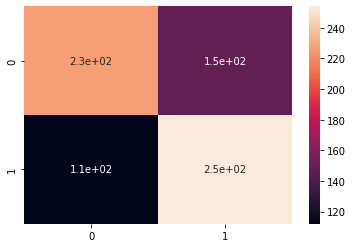

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       374
           1       0.63      0.69      0.66       366

    accuracy                           0.65       740
   macro avg       0.65      0.65      0.65       740
weighted avg       0.65      0.65      0.65       740



Observamos que los valores de precision, recall y f1 score son bastante bajos, intentaremos mejorar esto con el proximo modelo Random Forest

Aplicacion de un clasificador usando Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit (x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

<Axes: >

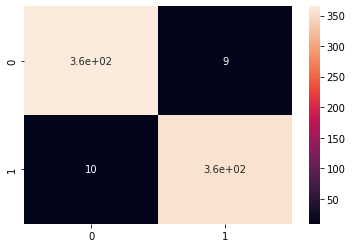

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       374
           1       0.98      0.97      0.97       366

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



Obtenemos una clara mejora en las metricas respecto al anterior modelo